In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/sample_data/height-weight.csv")

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


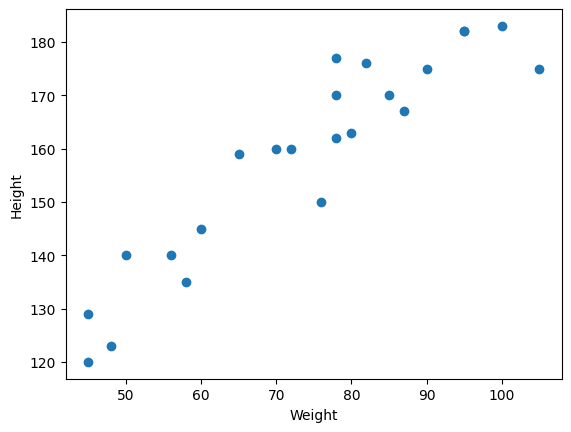

In [11]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [12]:
X=df[['Weight']]

In [14]:
X.shape

(23, 1)

In [15]:
Y=df['Height']

In [16]:
Y.shape

(23,)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

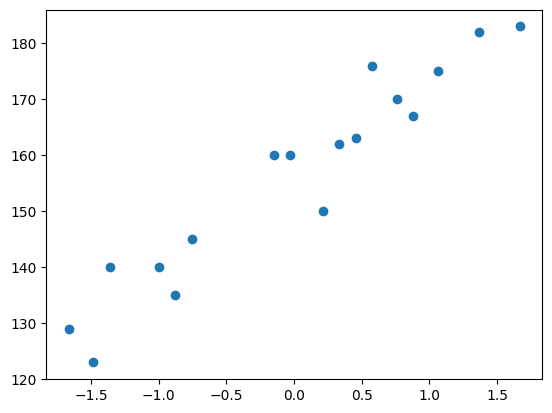

In [22]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
plt.scatter(x_train,Y_train)

In [24]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [25]:
regression.fit(x_train,Y_train)

LinearRegression()

In [26]:
print("Coeffecient or Slope : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coeffecient or Slope :  [17.2982057]
Intercept :  156.47058823529412


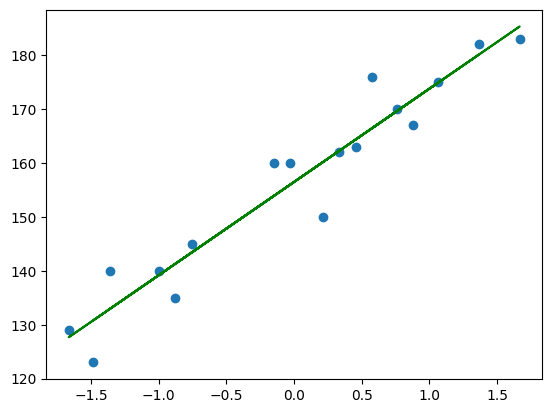

In [33]:
plt.scatter(x_train,Y_train)
plt.plot(x_train,regression.predict(x_train),'g')

In [35]:
y_pred_test = regression.predict(x_test)
y_pred_test,Y_test

(array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
        148.64197186, 190.55897293]),
 15    177
 9     170
 0     120
 8     182
 17    159
 12    175
 Name: Height, dtype: int64)

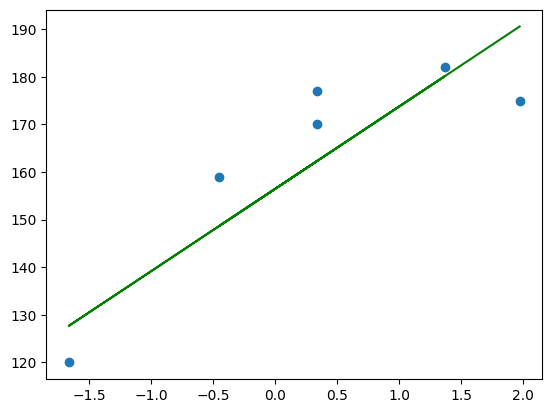

In [37]:
plt.scatter(x_test,Y_test)
plt.plot(x_test,regression.predict(x_test),'g')

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(Y_test,y_pred_test)
mae = mean_absolute_error(Y_test,y_pred_test)
rmse = np.sqrt(mse)

In [41]:
print("mean_squared_error : ",mse)
print("mean_absolute_error : ",mae)
print("root_mean_squared_error : ",rmse)

mean_squared_error :  114.84069295228699
mean_absolute_error :  9.66512588679501
root_mean_squared_error :  10.716374991212605


In [42]:
from sklearn.metrics import r2_score

In [44]:
score = r2_score(Y_test,y_pred_test)
score

0.7360826717981276

In [48]:
adjusted_r2 = 1 - ((1-score)*(len(Y_test)-1))/(len(Y_test)-x_test.shape[1]-1)
adjusted_r2

0.6701033397476595

In [50]:
scaled_weight = scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.45613165]])

In [51]:
print("Predicted Height for 80kg is : ",regression.predict([scaled_weight[0]]))

Predicted Height for 80kg is :  [164.36084726]
